## LEAD SCORING CASE STUDY

### Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals & Objectives
There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.


In [1]:
#Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

#Importing the required Libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

### Step 1 : Reading and Understanding the data

In [2]:
#Reading the dataset
lead = pd.read_csv('Leads.csv')

In [3]:
#Checking the first 5 rows of the data set
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Inspecting the dataset
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#Determining the shape of the datset
lead.shape

(9240, 37)

 Dataset has 9240 rows and 37 columns

In [6]:
#Viewing the overall Statistic Summary of the data set
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 2 : Data Cleaning

In [7]:
#Checking the number of unique values present in the data set
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
#Dropping 'Propect ID' and 'Lead Number' as the number of unique values is equal to the number of rows in the data:
lead = lead.drop(['Prospect ID','Lead Number'],axis=1)

In [9]:
#Replacing 'Select' with NaN as 'Select' means no option is selected:
lead = lead.replace('Select', np.nan)

In [10]:
#Checking the number of null values in every column:
lead.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

**Observations**:There are few columns with quite a high number of missing/null values in the dataframe.

In [11]:
#Checking for percentage of missing values in each column
(lead.isnull().mean()*100).sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

#### Removing columns with null value ratio more than 40%

In [12]:
lead = lead.drop(columns = ['How did you hear about X Education', 'Lead Quality','Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'])

In [13]:
lead.shape

(9240, 28)

**Observations**: We dropped 7 columns successfully which had more than 40% null values. Now we are left with 28 columns.

In [14]:
#Re-checking null value ratio after removal:
(lead.isnull().mean()*100).sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Lead Origin                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

##### As seen, there are still some columns with high null value ratio, but they can't be removed as they are important for analysis. Therefore, replacing the NaN values with 'Others'. And for some columns we shall impute it with mode.

In [15]:
lead['Specialization'] = lead['Specialization'].fillna('Others') 
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].fillna('Others')
lead['Country'] = lead['Country'].fillna('Others')
lead['What is your current occupation'] = lead['What is your current occupation'].fillna('Others')
lead['Tags'] = lead['Tags'].fillna('Others')
lead['City'] = lead['City'].fillna('Others')

#Replacing the missing values with mode
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].mode()[0],inplace = True)

#Replacing the missing values with mode
lead['TotalVisits'].fillna(lead['TotalVisits'].mode()[0], inplace=True)


#Replacing the missing values with mode
lead['Last Activity'].fillna(lead['Last Activity'].mode()[0], inplace=True)


In [16]:
#Re-checking the null value ratio:
round(lead.isnull().sum()/len(lead.index),2)*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

#### One thing to note that there are two values 'google' and 'Google' in Lead Source column We shall combine them.

In [17]:
#Replacing "google" with "Google"
lead['Lead Source'] = lead['Lead Source'].replace('google','Google')

In [18]:
lead.shape

(9240, 28)

In [19]:
#Checking if any null value is left:
round(lead.isnull().sum()/len(lead.index),2)*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

#### Finding percentage of rows retained

In [20]:
#Percentage of rows retained 
(len(lead.index)/9240)*100

100.0

#### Checking for duplicates

In [21]:
lead[lead.duplicated()]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
7,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,Others,...,No,No,No,Others,No,No,Others,No,No,Modified
16,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,Others,...,No,No,No,Others,No,No,Others,No,No,Modified
47,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,Others,...,No,No,No,Others,No,No,Others,No,No,Modified
49,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,Others,...,No,No,No,Others,No,No,Others,No,No,Modified
83,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,Others,...,No,No,No,Others,No,No,Others,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9170,API,Olark Chat,No,No,0,0.0,0,0.0,Email Opened,Others,...,No,No,No,Already a student,No,No,Others,No,No,Email Opened
9187,API,Olark Chat,No,No,1,0.0,0,0.0,SMS Sent,Others,...,No,No,No,Others,No,No,Others,No,No,SMS Sent
9199,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,Others,...,No,No,No,Already a student,No,No,Others,No,No,Modified
9217,API,Olark Chat,No,No,0,0.0,0,0.0,SMS Sent,Others,...,No,No,No,Ringing,No,No,Others,No,No,SMS Sent


**Observations:** The data set contains no duplicate data.

## Step 3 : Exploratory Data Analysis

#### Analyzing categorical columns, mainly 'Yes' & 'No' columns, to find out distribution of values in each column

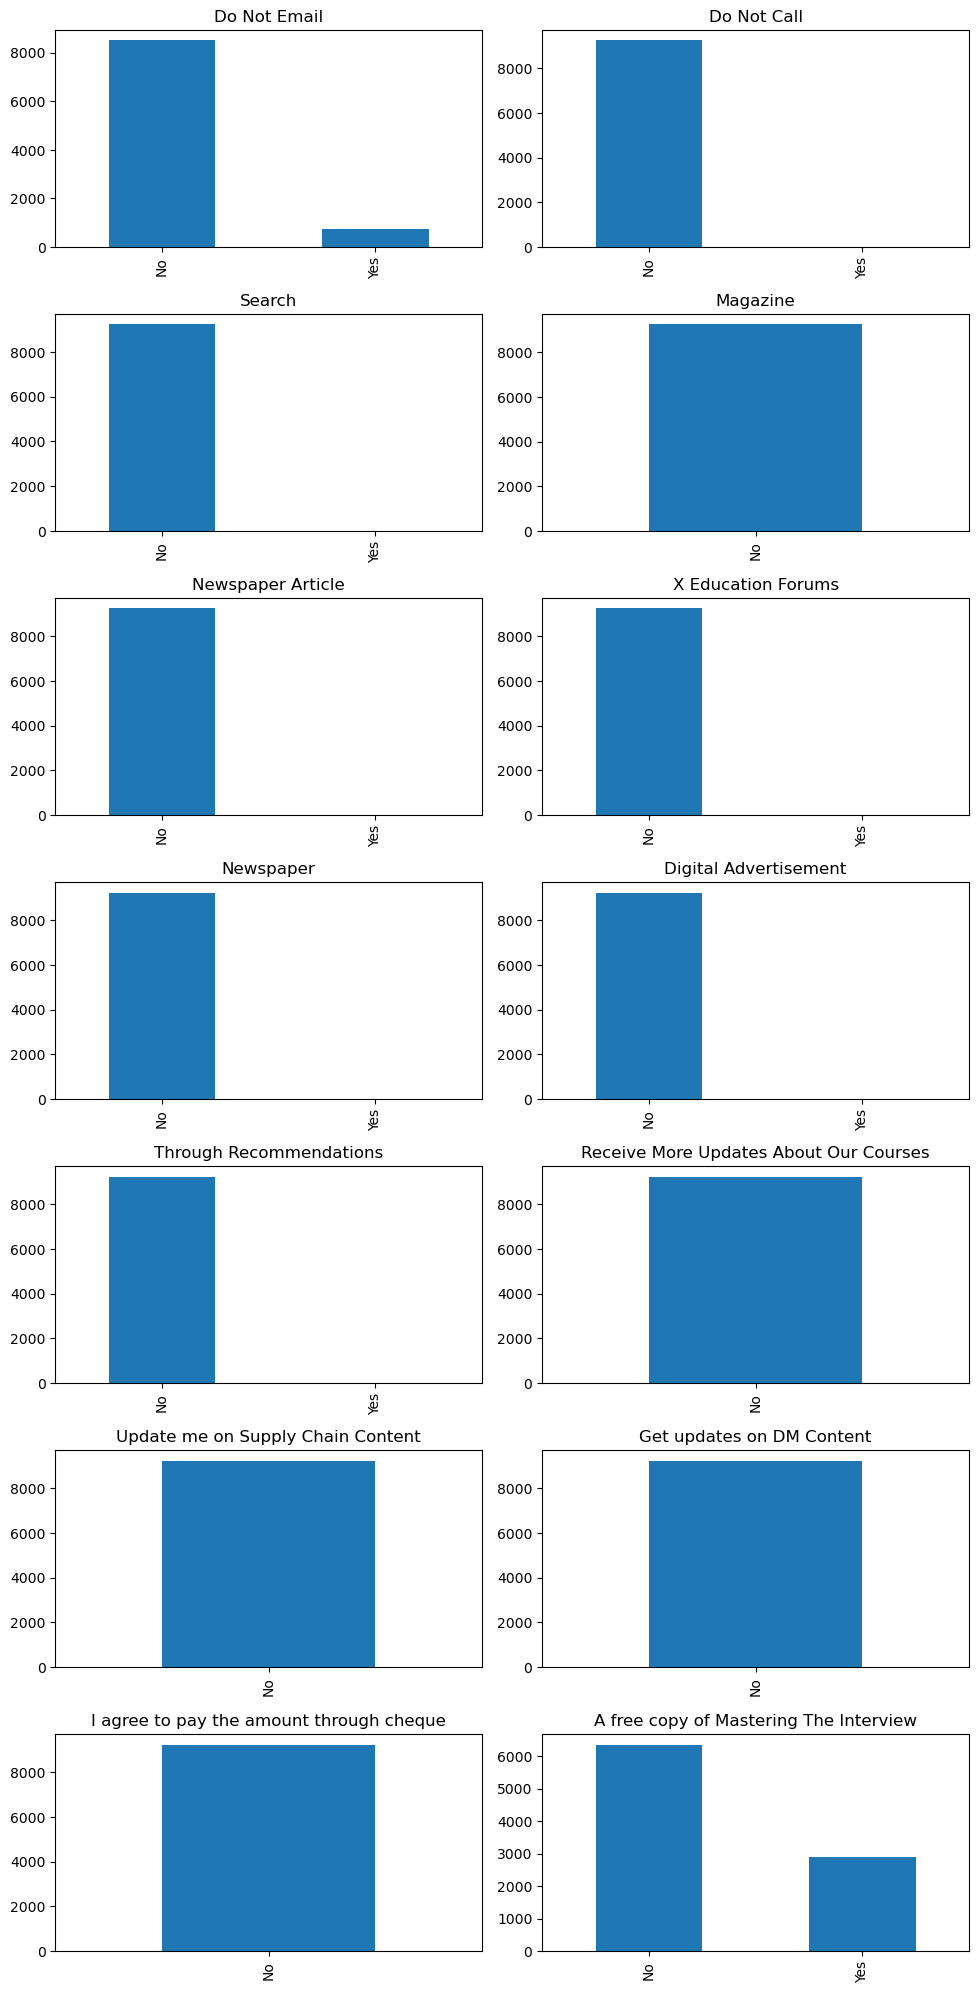

In [22]:
cat_cols = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']
plt.figure(figsize=(10,20))
for i in range(len(cat_cols)):
    plt.subplot(7,2,i+1)
    plt.tight_layout()
    lead[cat_cols[i]].value_counts().plot.bar()
    plt.title(cat_cols[i])

#### Insights-
1. Majority of the leads have chosen not to communicate via email or calls.
2. Majority of the leads are not aware about the ads.
3. None of the leads agree to pay the amount through cheque.

Overall, these insights are not so much on the positive side so far.

#### Analyzing columns with multiple categories

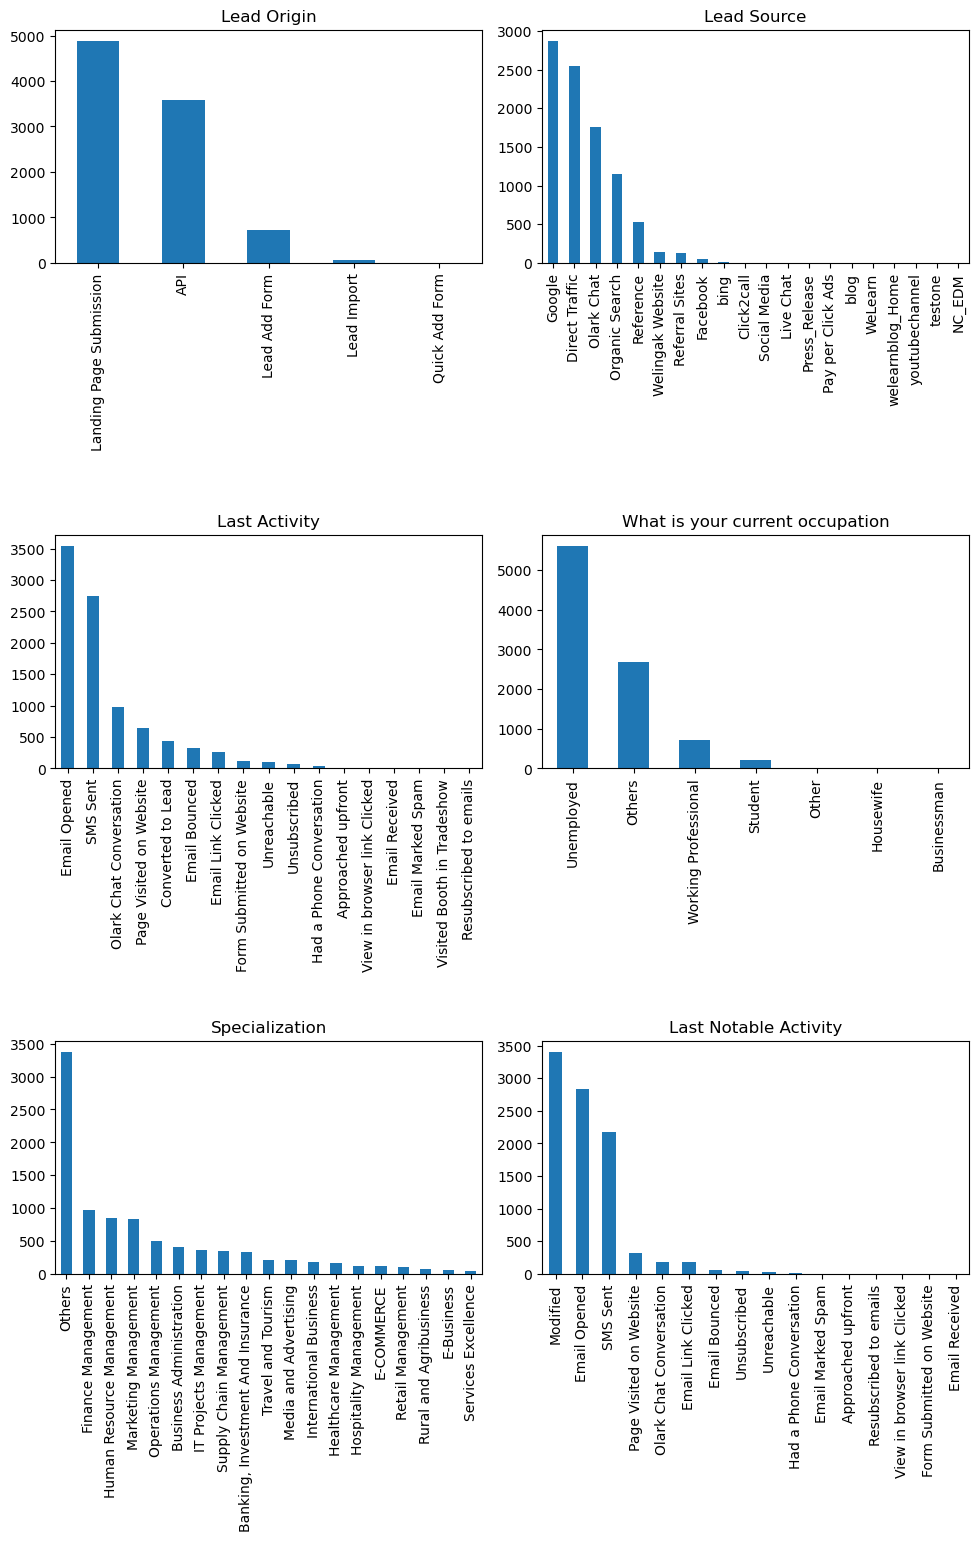

In [23]:
multi_cat_cols = ['Lead Origin','Lead Source','Last Activity','What is your current occupation','Specialization','Last Notable Activity']
plt.figure(figsize=(10,18))
for i in range(len(multi_cat_cols)):
    plt.subplot(4,2,i+1)
    plt.tight_layout()
    lead[multi_cat_cols[i]].value_counts().plot.bar()
    plt.title(multi_cat_cols[i])

#### Insights-
1. Majority of leads originate from Google, followed by Direct traffic and Olark chat.
2. Majority of leads are unemployed, followed by Other and Working professional.
3. In terms of Specialization, most are from Other, then Finance Management and Human Resource Management.
4. Highest number of leads were identified through Landing Page Submission.

### Univariate and Bivariate Analysis

### 1. Converted
'Converted' is the target variable, it tells whether a lead has been successfully converted(1) or not(0)

In [24]:
converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
converted

38.53896103896104

**Observations**: 
- **Conversion rate is of 38.5%**, meaning only 38.5% of the people have converted to leads.(Minority)
- While 61.5% of the people didn't convert to leads. (Majority)

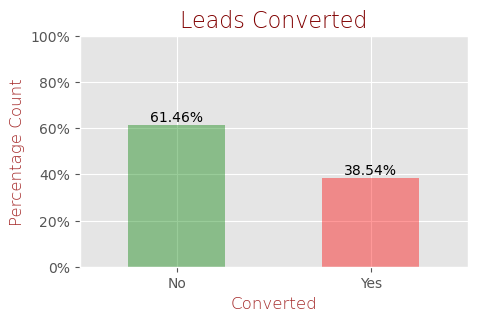

In [25]:
#Plotting the result on barplot:

plt.figure(figsize = [5,3])
plt.style.use('ggplot')

ax=(100*lead["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Red"],alpha=0.4)

#Adding the title:
plt.title("Leads Converted",fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Maroon'})

#Labeling Axes:
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

#Modification ticks y axis:
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks:
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

In [26]:
#Creating a function for plotting the countplot for Categorical Variables with conversion:

def countplot(i):
    plt.figure(figsize = [12,4])
    plt.style.use('ggplot')

    ax = sns.countplot(data = lead, x = i,hue = 'Converted')
    total=len(lead[i])
    
    plt.xticks(rotation=90)


    #Adding the title
    plt.title("Countplot of {} with {}".format(i, 'Converted'), fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Maroon'})

    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    

    plt.show()

### 2. Lead Origin

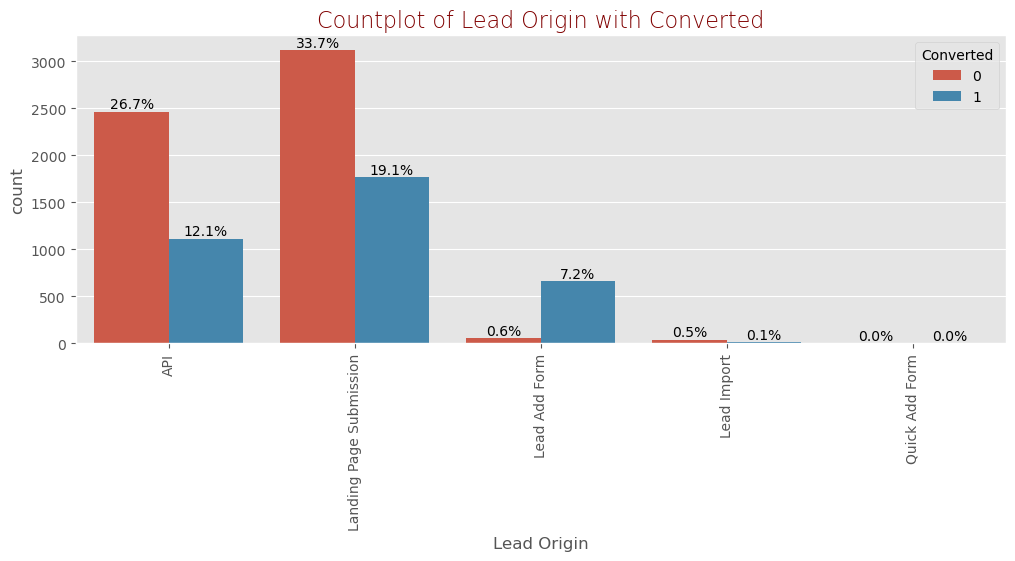

In [27]:
#Plotting the countplot for 'Lead Origin':
countplot('Lead Origin')

#### INSIGHTS-
1. Landing Page Submission identified 53.9% customers out of which 19.5% got converted, followed by API whcih identified 39.4% of the customers out of which 12.3% got converted.
2. The Lead Add Form demonstrates a good conversion rate.

### 3. Lead Scource

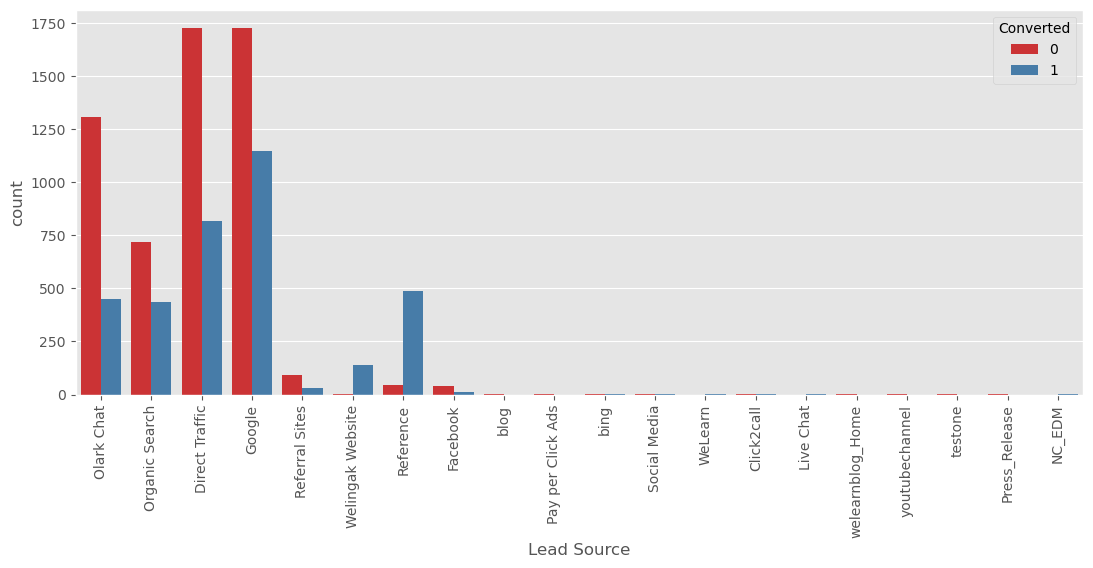

In [28]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead, palette='Set1')
plt.xticks(rotation = 90);

#### INSIGHTS-
1. Majority of leads originate from Google, followed by Direct traffic and Olark chat.
2. Reference and Welingak Website demonstrates a good conversion rate although the total number of leads is comparatively low.

### 4. Last Activity

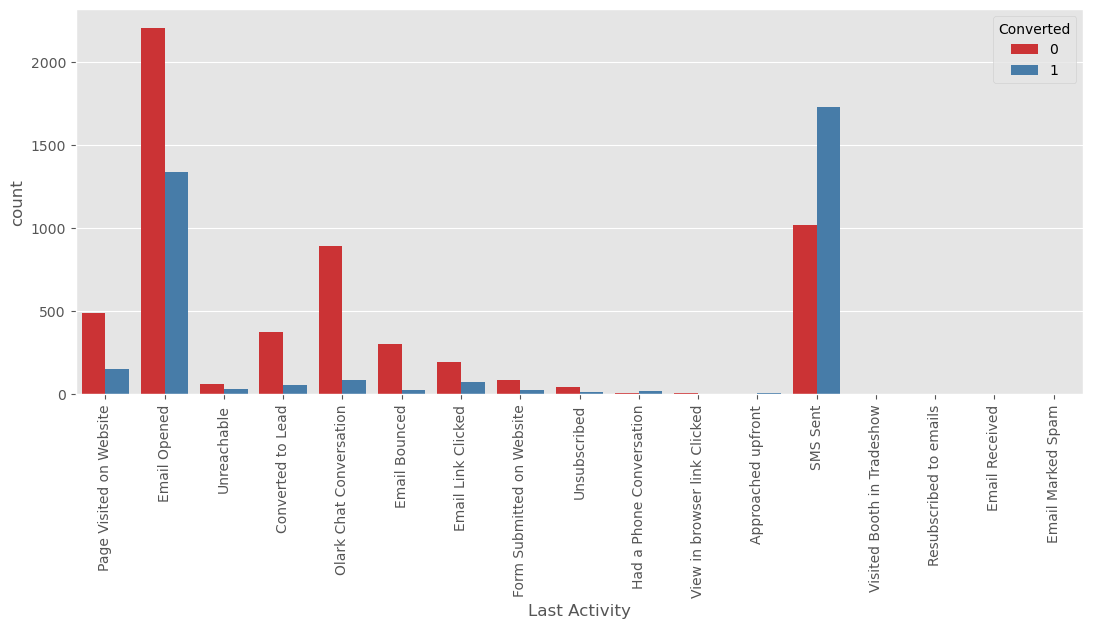

In [29]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead, palette='Set1')
plt.xticks(rotation = 90);

#### INSIGHTS-
1. Majority of the leads originated from 'SMS Sent'.
2. The total number of leads from 'Email Opened' is highest but its conversion rate is comparatively less. 

### 5. Specialization

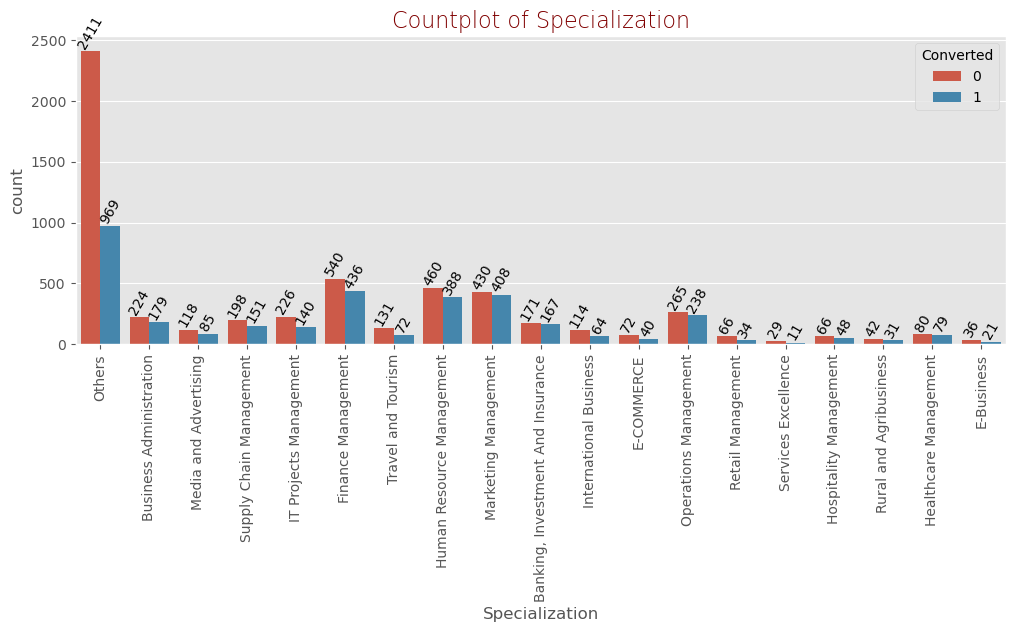

In [30]:
#Visualizing the count of variable based on number of Conversions:

plt.figure(figsize = [12,4])
plt.style.use('ggplot')

ax = sns.countplot(data = lead, x = 'Specialization', hue = 'Converted')

plt.title("Countplot of Specialization", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Maroon'})
for x in ax.containers:
        ax.bar_label(x,rotation=60)
plt.xticks(rotation=90)

plt.show()

**Observations:**
- Marketing Managemt,HR Management,Finance Management shows good contribution.

### 6. Current occupation

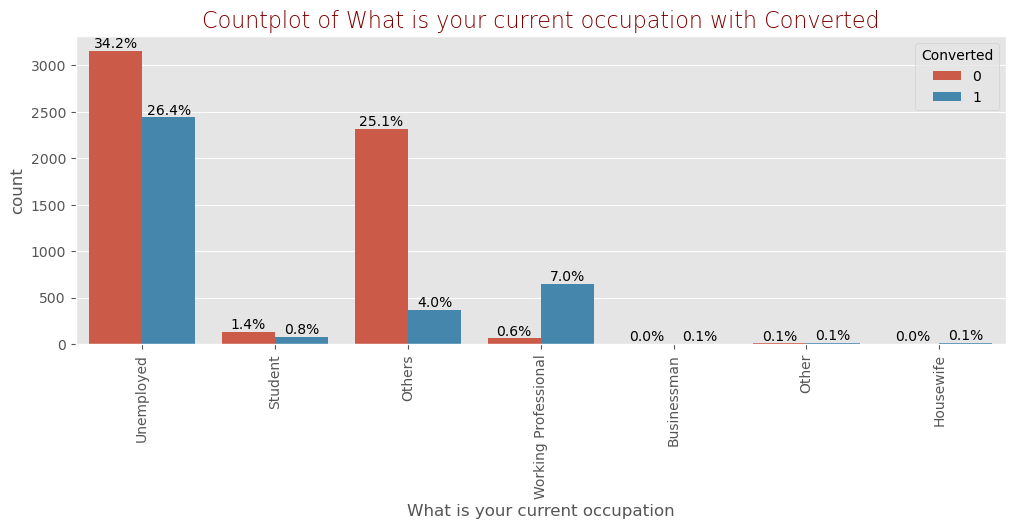

In [31]:
countplot('What is your current occupation')

#### INSIGHTS-
- Unemployed customers are opting for online courses followed by Working Professional.

<Figure size 1600x600 with 0 Axes>

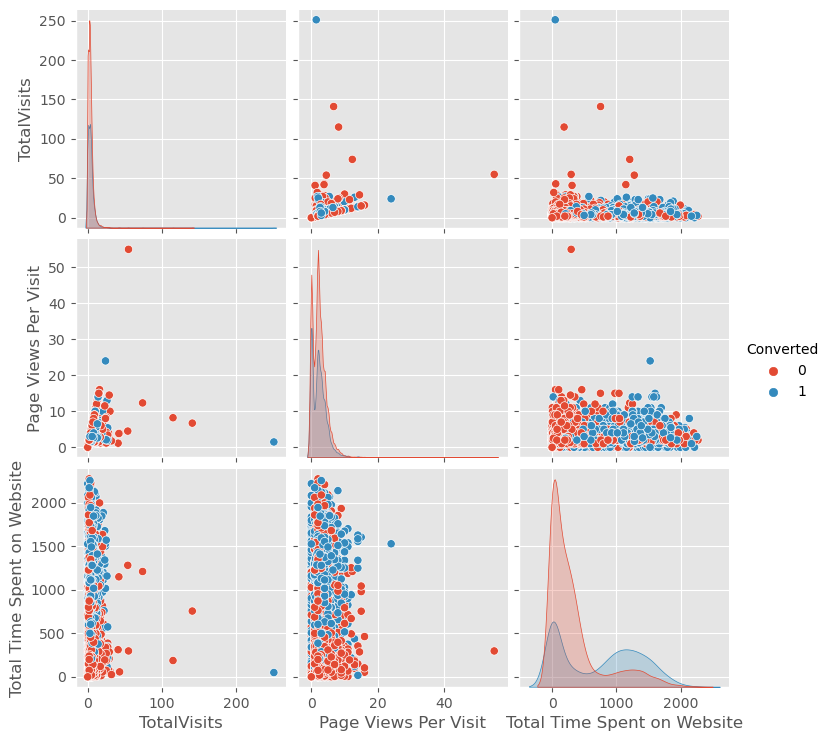

In [32]:
num1 = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

plt.figure(figsize=(16, 6))
sns.pairplot(data=lead,vars=num1,hue="Converted")                                  
plt.show()

### Comparing distribution of Converted and Non Converted leads for remaining columns

In [33]:
#Creating function for comparison: 
def bar(col):
    sns.countplot(data = lead, x = col, hue = 'Converted')
    plt.xticks(rotation=90)
    plt.title(col)

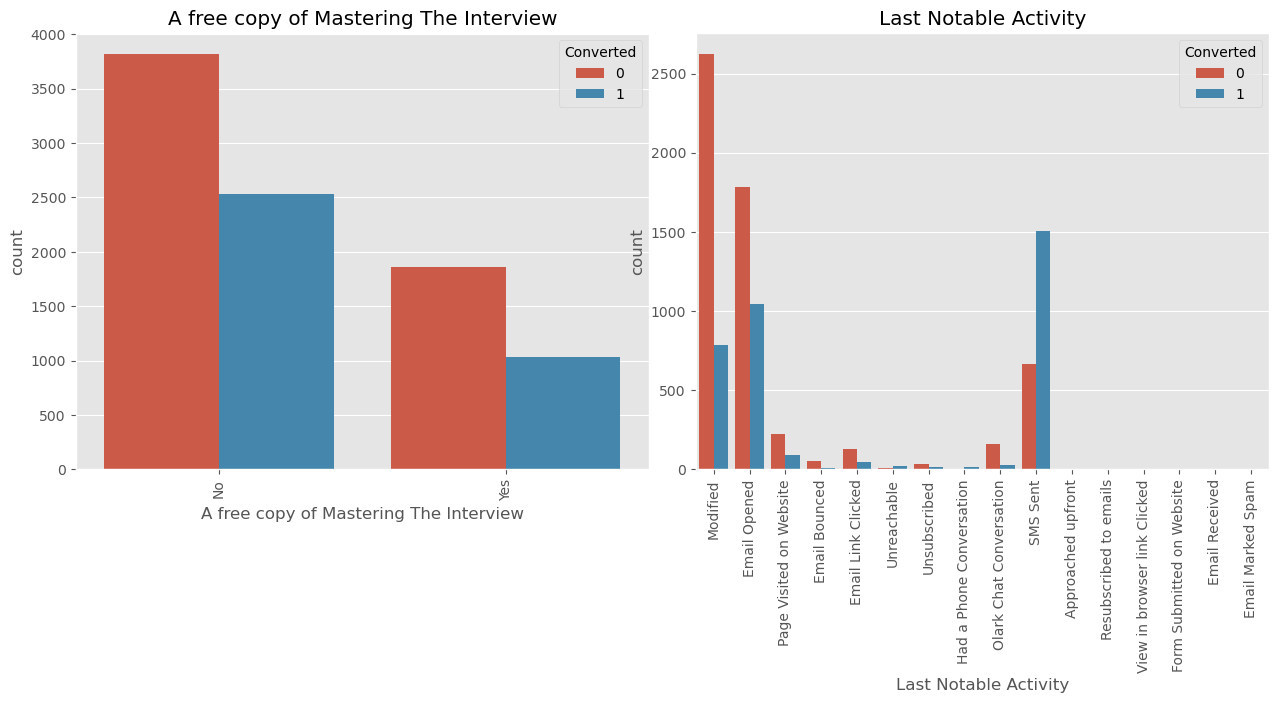

In [34]:
cols = ['A free copy of Mastering The Interview','Last Notable Activity']
plt.figure(figsize=(13,20))
for i in range(len(cols)):
    plt.subplot(4,2,i+1)
    plt.tight_layout()
    bar(cols[i])

#### INSIGHTS-
1. Most Working Professional gets converted.
2. Conversion rate of people whose 'Last Activity' is 'SMS Sent' is high.

### Outliers

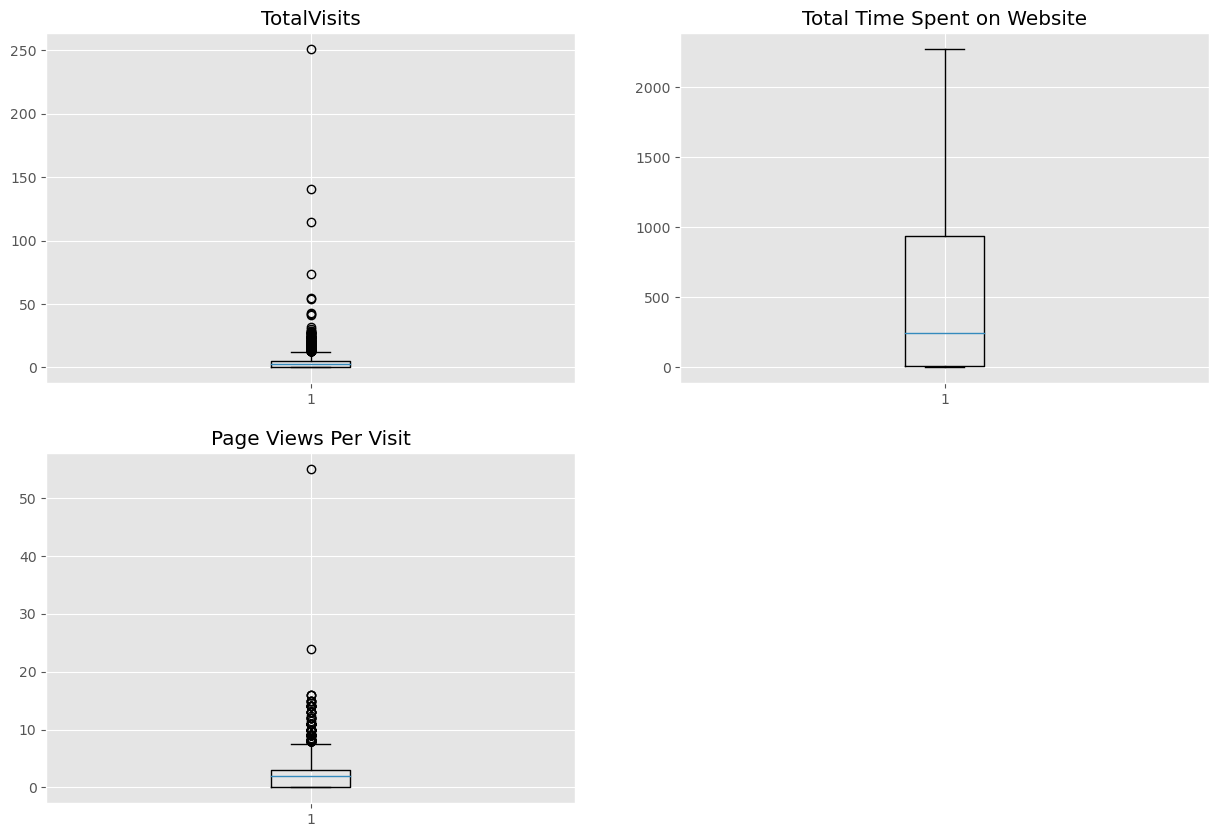

In [35]:
#Checking outliers in numeric columns:
cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(15,10))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    plt.boxplot(lead[cols[i]])
    plt.title(cols[i])

---- As it can be seen, there are outliers in Total Visits and Page Views per Visit ----

### Treating Outliers

In [36]:
#before outlier treatment:
lead.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,251.000000,2272.000000,55.000000


In [37]:
#Defining fucntion to treat outliers via capping and flooring:

def Outlier_treatment(lead,cols):
    for i in cols:
        q1 = lead[i].describe()["25%"]
        q3 = lead[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound:
        lead[i] = np.where(lead[i] > upper_bound, upper_bound,lead[i])

        # flooring lower_bound:
        lead[i] = np.where(lead[i] < lower_bound, lower_bound,lead[i])

In [38]:
#Checking outliers for numerical variables other than target variable:
capping_cols = ["TotalVisits","Page Views Per Visit"]

#Calling the function:
Outlier_treatment(lead,capping_cols)

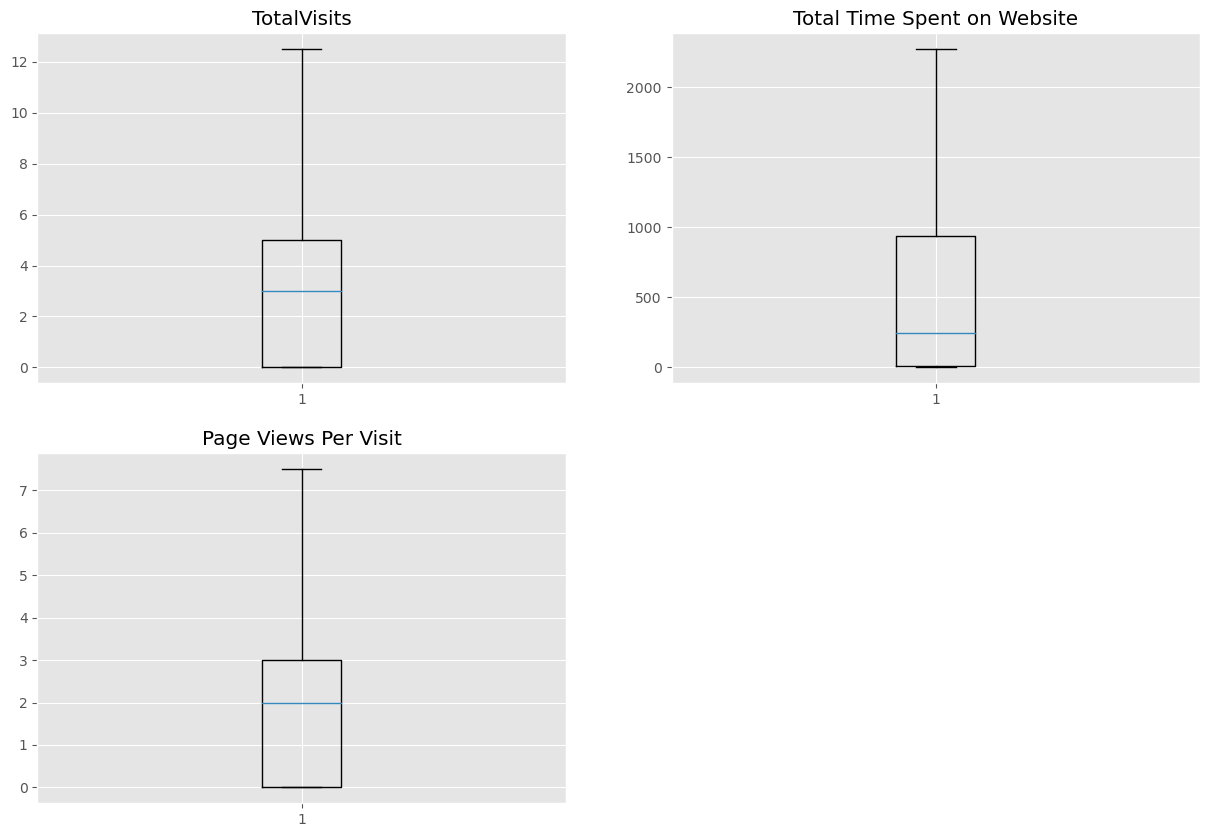

In [39]:
#Checking Boxplot after Outlier Treatment:
cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(15,10))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    plt.boxplot(lead[cols[i]])
    plt.title(cols[i])

In [40]:
#after outlier treatment detailed percentile values:
lead.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.213853,487.698268,2.274987
std,0.486714,3.005136,548.021466,1.917776
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,12.500000,2272.000000,7.500000


### Correlation

<Axes: >

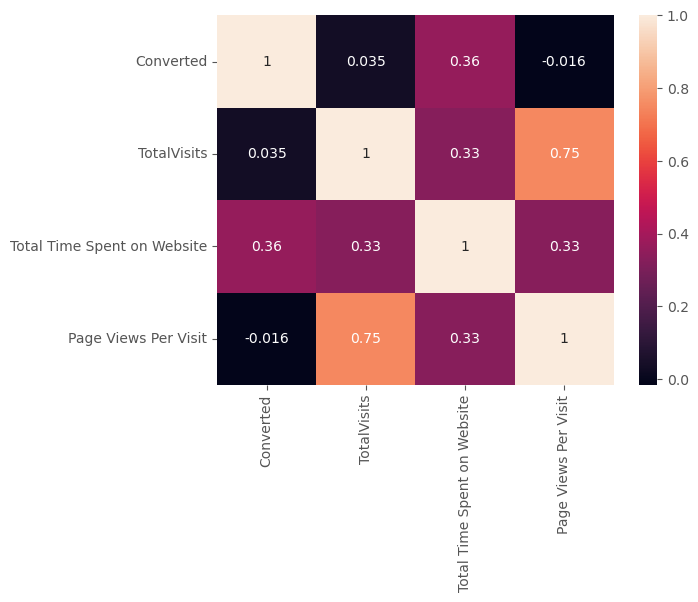

In [41]:
#Checking correlation between columns,if any:
sns.heatmap(lead.corr(),annot=True)

**Observations:** 
- Total Time Spent on Website have a positive correlation with other variables.

#### Removing columns which do not contribute much to the model

In [42]:
lead = lead.drop(['Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview', 'What matters most to you in choosing a course'],1)

In [43]:
#Checking the shape of dataset after removal:
lead.shape

(9240, 13)

**Observation:** We are left with 13 columns.

In [44]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9204 non-null   object 
 2   Do Not Email                     9240 non-null   object 
 3   Do Not Call                      9240 non-null   object 
 4   Converted                        9240 non-null   int64  
 5   TotalVisits                      9240 non-null   float64
 6   Total Time Spent on Website      9240 non-null   int64  
 7   Page Views Per Visit             9240 non-null   float64
 8   Last Activity                    9240 non-null   object 
 9   Specialization                   9240 non-null   object 
 10  What is your current occupation  9240 non-null   object 
 11  City                             9240 non-null   object 
 12  Last Notable Activit

## Step 4 : Data Preparation

#### Converting 'Yes' / 'No' column values to 1 and 0

In [45]:
lead['Do Not Email'] = lead['Do Not Email'].replace(['Yes','No'],[1,0])
lead['Do Not Call'] = lead['Do Not Call'].replace(['Yes','No'],[1,0])

In [46]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Others,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Others,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified


### Dummy Variables
Creating dummy variables for categorical columns

In [47]:
dummy = pd.get_dummies(lead[['Lead Origin','Lead Source','Specialization','Last Activity','What is your current occupation','Last Notable Activity', 'City']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#Concatenating the dummy data to the lead dataframe:
lead = pd.concat([lead, dummy], axis=1)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,...,0,0,0,0,0,0,0,1,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,...,0,0,0,0,0,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#Dropping unnecessary columns as we have already created dummy variable out of it:
lead = lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [50]:
lead.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 5 : Splitting data into Training and Test Sets

In [51]:
#importing the library for splitting the data set 

from sklearn.model_selection import train_test_split

In [52]:
#Splitting the dataframe into Train and Test (70:30 ratio):
lead_train, lead_test = train_test_split(lead, train_size=0.7,random_state=100)

In [53]:
#Checking the shape of training and test datatset:
print('Train data shape: ',lead_train.shape)
print('Test data shape:  ',lead_test.shape)

Train data shape:  (6468, 90)
Test data shape:   (2772, 90)


In [54]:
y_train = lead_train.pop('Converted')
X_train = lead_train

In [55]:
y_train.head()

1871    0
6795    0
3516    0
8105    0
3934    0
Name: Converted, dtype: int64

In [56]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Thane & Outskirts,City_Tier II Cities
1871,0,0,0.0,0,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6795,0,0,4.0,487,1.33,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3516,0,0,5.0,106,2.50,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8105,0,0,5.0,1230,5.00,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3934,0,0,0.0,0,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Step 6 - Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()
scale_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])

In [59]:
X_train[scale_cols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6.468000e+03,6.468000e+03,6.468000e+03
mean,1.098551e-18,-6.701161e-17,6.508914e-17
std,1.000077e+00,1.000077e+00,1.000077e+00
min,-1.064974e+00,-8.853708e-01,-1.184892e+00
25%,-1.064974e+00,-8.634138e-01,-1.184892e+00
50%,-6.946596e-02,-4.352528e-01,-1.380066e-01
75%,5.942058e-01,8.098906e-01,3.854361e-01
max,3.082975e+00,3.271816e+00,2.740929e+00


In [60]:
X_train.info('All')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 89 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6468 non-null   int64  
 1   Do Not Call                                           6468 non-null   int64  
 2   TotalVisits                                           6468 non-null   float64
 3   Total Time Spent on Website                           6468 non-null   float64
 4   Page Views Per Visit                                  6468 non-null   float64
 5   Lead Origin_Landing Page Submission                   6468 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6468 non-null   uint8  
 7   Lead Origin_Lead Import                               6468 non-null   uint8  
 8   Lead Origin_Quick Add Form                            6

## Step 7 : Recursive Feature Elimination
RFE is a feature selection technique that recursively removes features, fits a model, and then evaluates the performance until the desired number of features is reached.

In [61]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [62]:
#creating model object
logreg = LogisticRegression()

rfe = RFE(logreg,n_features_to_select=20)   # running RFE with 20 variables as output

rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [63]:
#Checking Which Variables are selected


list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 22),
 ('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 30),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 6),
 ('Lead Origin_Quick Add Form', False, 47),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 35),
 ('Lead Source_NC_EDM', False, 20),
 ('Lead Source_Olark Chat', False, 21),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 36),
 ('Lead Source_Press_Release', False, 38),
 ('Lead Source_Reference', False, 33),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 23),
 ('Lead Source_WeLearn', False, 32),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 61),
 ('Lead Source_blog', False, 44),
 ('Lead Source_testone', F

In [64]:
#Viewing columns selected by RFE:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [65]:
#Let's check which columns are rejected:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Spec

## Step 8 : Model Building

In [66]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#defining function to calculate VIF:
def VIF(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

#### MODEL 1

In [67]:
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train[cols])

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

result = logm1.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.1
Date:                Mon, 18 Mar 2024   Deviance:                       5152.1
Time:                        17:38:56   Pearson chi2:                 7.07e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4130
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9385      0.138      6.798      0.000       0.668       1.209
Do Not Email                                            -1.1494      0.170     -6.766      0.000      -1.482      -0.816
Total Time Spent on Website                              1.0756      0.040     26.659      0.000       0.997       1.155
Lead Origin_Landing Page Submission                     -0.9231      0.136     -6.781      0.000      -1.190      -0.656
Lead Origin_Lead Add Form                                2.0021      0.203      9.851      0.000       1.604       2.401
Lead Source_Direct Traffic                              -1.2480      0.148     -8.428      0.000      -1.538      -0.958
Lead Source_Facebook                                    -1.1704      0.516     -2.270      0.023      -2.181      -0.160
Lead Source_Google                                      -0.9055      0.126     -7.185      0.000      -1.152      -0.658
Lead Source_Organic Search                              -1.0921      0.147     -7.408      0.000      -1.381      -0.803
Lead Source_Referral Sites                              -1.0704      0.329     -3.254      0.001      -1.715      -0.426
Lead Source_Welingak Website                             2.3347      0.745      3.133      0.002       0.874       3.795
Specialization_Hospitality Management                   -0.9627      0.333     -2.891      0.004      -1.615      -0.310
Specialization_Others                                   -0.9870      0.125     -7.911      0.000      -1.232      -0.742
Last Activity_Had a Phone Conversation                   1.2825      0.975      1.315      0.188      -0.628       3.193
Last Activity_SMS Sent                                   1.3060      0.075     17.328      0.000       1.158       1.454
What is your current occupation_Housewife               22.8587   1.35e+04      0.002      0.999   -2.64e+04    2.65e+04
What is your current occupation_Others                  -1.0372      0.088    -11.747      0.000      -1.210      -0.864
What is your current occupation_Working Professional     2.4403      0.193     12.616      0.000       2.061       2.819
Last Notable Activity_Had a Phone Conversation           1.9312      1.482      1.303      0.193      -0.974       4.837
Last Notable Activity_Modified                          -0.9022      0.080    -11.212      0.000      -1.060      -0.744
Last Notable Activity_Unreachable                        1.7071      0.552      3.093      0.002       0.625       2.789
========================================================================================================================
"""

#### Adjustment 1 
Since, P-value of 'What is your current occupation_Housewife' is very high, this column can be removed

In [68]:
cols = cols.drop('What is your current occupation_Housewife')

#### MODEL 2

In [69]:
## Adding a constant variable 
X_train_sm = sm.add_constant(X_train[cols])

#create a fitted model
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

result = logm2.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2583.0
Date:                Mon, 18 Mar 2024   Deviance:                       5166.0
Time:                        17:38:56   Pearson chi2:                 7.08e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4118
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9429      0.138      6.834      0.000       0.672       1.213
Do Not Email                                            -1.1552      0.170     -6.801      0.000      -1.488      -0.822
Total Time Spent on Website                              1.0743      0.040     26.660      0.000       0.995       1.153
Lead Origin_Landing Page Submission                     -0.9147      0.136     -6.726      0.000      -1.181      -0.648
Lead Origin_Lead Add Form                                2.0180      0.203      9.941      0.000       1.620       2.416
Lead Source_Direct Traffic                              -1.2534      0.148     -8.471      0.000      -1.543      -0.963
Lead Source_Facebook                                    -1.1720      0.516     -2.273      0.023      -2.182      -0.162
Lead Source_Google                                      -0.9041      0.126     -7.179      0.000      -1.151      -0.657
Lead Source_Organic Search                              -1.0881      0.147     -7.390      0.000      -1.377      -0.799
Lead Source_Referral Sites                              -1.0728      0.329     -3.263      0.001      -1.717      -0.428
Lead Source_Welingak Website                             2.3189      0.745      3.112      0.002       0.859       3.779
Specialization_Hospitality Management                   -0.9704      0.333     -2.915      0.004      -1.623      -0.318
Specialization_Others                                   -0.9906      0.125     -7.945      0.000      -1.235      -0.746
Last Activity_Had a Phone Conversation                   1.2723      0.975      1.305      0.192      -0.639       3.184
Last Activity_SMS Sent                                   1.2983      0.075     17.241      0.000       1.151       1.446
What is your current occupation_Others                  -1.0420      0.088    -11.811      0.000      -1.215      -0.869
What is your current occupation_Working Professional     2.4312      0.193     12.574      0.000       2.052       2.810
Last Notable Activity_Had a Phone Conversation           1.9298      1.483      1.302      0.193      -0.976       4.836
Last Notable Activity_Modified                          -0.8973      0.080    -11.176      0.000      -1.055      -0.740
Last Notable Activity_Unreachable                        1.7001      0.552      3.080      0.002       0.618       2.782
========================================================================================================================
"""

#### Adjustment 2 -
Removing 'Last Notable Activity_Had a Phone Conversation' due to high p-value

In [70]:
cols = cols.drop('Last Notable Activity_Had a Phone Conversation')

#### MODEL 3

In [71]:
#Adding a constant variable

X_train_sm = sm.add_constant(X_train[cols])

#create a fitted model
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

result = logm3.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2583.9
Date:                Mon, 18 Mar 2024   Deviance:                       5167.9
Time:                        17:38:56   Pearson chi2:                 7.91e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4116
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9461      0.138      6.860      0.000       0.676       1.216
Do Not Email                                            -1.1573      0.170     -6.817      0.000      -1.490      -0.825
Total Time Spent on Website                              1.0727      0.040     26.643      0.000       0.994       1.152
Lead Origin_Landing Page Submission                     -0.9151      0.136     -6.736      0.000      -1.181      -0.649
Lead Origin_Lead Add Form                                2.0165      0.203      9.932      0.000       1.619       2.414
Lead Source_Direct Traffic                              -1.2543      0.148     -8.480      0.000      -1.544      -0.964
Lead Source_Facebook                                    -1.1700      0.515     -2.270      0.023      -2.180      -0.160
Lead Source_Google                                      -0.9016      0.126     -7.160      0.000      -1.148      -0.655
Lead Source_Organic Search                              -1.0897      0.147     -7.401      0.000      -1.378      -0.801
Lead Source_Referral Sites                              -1.0823      0.330     -3.277      0.001      -1.730      -0.435
Lead Source_Welingak Website                             2.3219      0.745      3.116      0.002       0.862       3.782
Specialization_Hospitality Management                   -0.9699      0.333     -2.914      0.004      -1.622      -0.318
Specialization_Others                                   -0.9936      0.125     -7.972      0.000      -1.238      -0.749
Last Activity_Had a Phone Conversation                   2.2642      0.677      3.343      0.001       0.937       3.592
Last Activity_SMS Sent                                   1.2972      0.075     17.231      0.000       1.150       1.445
What is your current occupation_Others                  -1.0413      0.088    -11.806      0.000      -1.214      -0.868
What is your current occupation_Working Professional     2.4280      0.193     12.554      0.000       2.049       2.807
Last Notable Activity_Modified                          -0.9031      0.080    -11.262      0.000      -1.060      -0.746
Last Notable Activity_Unreachable                        1.6971      0.552      3.075      0.002       0.615       2.779
========================================================================================================================
"""

**Observations:** The p-values of all variables seems fine as it is less than 0.05. We shall check the VIF.

In [72]:
#checking the VIF
VIF(X_train_sm)

,Features,VIF
2,Lead Origin_Landing Page Submission,6.20
4,Lead Source_Direct Traffic,4.03
6,Lead Source_Google,3.08
11,Specialization_Others,2.40
7,Lead Source_Organic Search,1.83
16,Last Notable Activity_Modified,1.69
14,What is your current occupation_Others,1.60
13,Last Activity_SMS Sent,1.54
3,Lead Origin_Lead Add Form,1.48
9,Lead Source_Welingak Website,1.27


#### Adjustment 3 -
Removing 'Lead Origin_Landing Page Submission' due to high VIF.

In [73]:
cols = cols.drop('Lead Origin_Landing Page Submission')

#### MODEL 4

In [74]:
#Adding a constant variable
X_train_sm = sm.add_constant(X_train[cols])

#create a fitted model
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

result = logm4.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.1
Date:                Mon, 18 Mar 2024   Deviance:                       5214.1
Time:                        17:38:56   Pearson chi2:                 7.66e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4074
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4939      0.118      4.189      0.000       0.263       0.725
Do Not Email                                            -1.1905      0.169     -7.064      0.000      -1.521      -0.860
Total Time Spent on Website                              1.0844      0.040     27.001      0.000       1.006       1.163
Lead Origin_Lead Add Form                                2.2256      0.201     11.100      0.000       1.833       2.619
Lead Source_Direct Traffic                              -1.7021      0.133    -12.777      0.000      -1.963      -1.441
Lead Source_Facebook                                    -1.1538      0.516     -2.237      0.025      -2.165      -0.143
Lead Source_Google                                      -1.1738      0.120     -9.821      0.000      -1.408      -0.940
Lead Source_Organic Search                              -1.3724      0.141     -9.703      0.000      -1.650      -1.095
Lead Source_Referral Sites                              -1.1989      0.331     -3.623      0.000      -1.847      -0.550
Lead Source_Welingak Website                             2.0448      0.744      2.750      0.006       0.587       3.502
Specialization_Hospitality Management                   -0.9350      0.328     -2.850      0.004      -1.578      -0.292
Specialization_Others                                   -0.4258      0.091     -4.697      0.000      -0.603      -0.248
Last Activity_Had a Phone Conversation                   2.2948      0.673      3.410      0.001       0.976       3.614
Last Activity_SMS Sent                                   1.2652      0.075     16.923      0.000       1.119       1.412
What is your current occupation_Others                  -1.0776      0.088    -12.294      0.000      -1.249      -0.906
What is your current occupation_Working Professional     2.4698      0.191     12.959      0.000       2.096       2.843
Last Notable Activity_Modified                          -0.8881      0.079    -11.173      0.000      -1.044      -0.732
Last Notable Activity_Unreachable                        1.7626      0.546      3.229      0.001       0.693       2.833
========================================================================================================================
"""

In [75]:
#checking the VIF
VIF(X_train_sm)

,Features,VIF
10,Specialization_Others,1.72
15,Last Notable Activity_Modified,1.67
13,What is your current occupation_Others,1.56
5,Lead Source_Google,1.54
12,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.48
3,Lead Source_Direct Traffic,1.41
8,Lead Source_Welingak Website,1.26
1,Total Time Spent on Website,1.23
6,Lead Source_Organic Search,1.20


**Observations:** Model 4 is stable and has significant p-values within the threshold (p-values < 0.05), so we will use it for further analysis. Also, all VIF are less than 5. No more variable needs to be dropped.

#### Making predictions on train dataset

In [76]:
# Getting the predicted values on the train set
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

1871    0.385525
6795    0.164142
3516    0.335903
8105    0.887526
3934    0.144294
4844    0.989512
3297    0.158440
8071    0.998190
987     0.080209
7423    0.908933
dtype: float64

In [77]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.38552522, 0.16414216, 0.33590266, 0.88752639, 0.14429382,
       0.98951232, 0.15843957, 0.99818993, 0.0802093 , 0.90893334])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [78]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.385525,1871
1,0,0.164142,6795
2,0,0.335903,3516
3,0,0.887526,8105
4,0,0.144294,3934


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [79]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.385525,1871,0
1,0,0.164142,6795,0
2,0,0.335903,3516,0
3,0,0.887526,8105,1
4,0,0.144294,3934,0


### Confusion Matrix

In [80]:
from sklearn import metrics

#Confusion matrix: 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3541  461]
 [ 734 1732]]


In [81]:
#Checking the overall accuracy:
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8152442795299938


### Metrics beyond simple accuracy

In [82]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [83]:
#Checking sensitivity of logistic regression model:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7023519870235199


In [84]:
#Calculating specificity:
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8848075962018991


In [85]:
#Calculating False Postive Rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.11519240379810095


In [86]:
#Calculating positive predictive value: 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7897856817145463


In [87]:
#Calculating negative predictive value:
print (TN / float(TN+ FN))

0.8283040935672514


### INSIGHTS -
##### The model seems to have high Accuracy - 81.5%, high Specificity - 88.48% and moderate Sensitivity - 70.23%. But, Sensitivity is needed to be dealt with. This can be because of cut-off, which was chosen at random and there was no particular logic behind it. So it might not be the ideal cut-off point for classification which is why Sensitivity is low comparatively.

## Step 9 : Plotting the ROC Curve
> The ROC curve provides a comprehensive overview of the model's performance across various thresholds. It allows to visualize how well the model distinguishes between positive and negative cases by plotting the true positive rate against the false positive rate.

> It shows tradeoff between SENSITIVITY and SPECIFICITY.

> The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

In [88]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [89]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

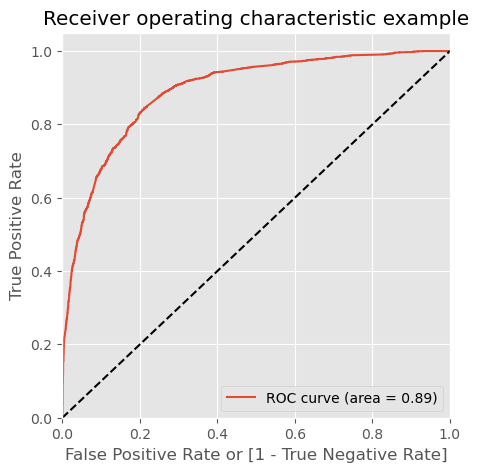

In [90]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

##### By determining the area under the curve (AUC) of an ROC curve, that is, 0.89, it can be determined how good the model is. As the ROC curve is more towards the upper-left corner of the graph, it means that the model is very good. 

## Step 10 : Finding Optimal Cutoff Point

In [91]:
#Creating columns with different probability cutoffs:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.385525,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.164142,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.335903,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.887526,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.144294,3934,0,1,1,0,0,0,0,0,0,0,0


In [92]:
#Now calculating accuracy sensitivity and specificity for various probability cutoffs:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.616883  0.971614  0.398301
0.2   0.2  0.768089  0.918897  0.675162
0.3   0.3  0.809369  0.845499  0.787106
0.4   0.4  0.812616  0.764396  0.842329
0.5   0.5  0.815244  0.702352  0.884808
0.6   0.6  0.805040  0.613950  0.922789
0.7   0.7  0.790043  0.534063  0.947776
0.8   0.8  0.764997  0.435118  0.968266
0.9   0.9  0.721088  0.289943  0.986757


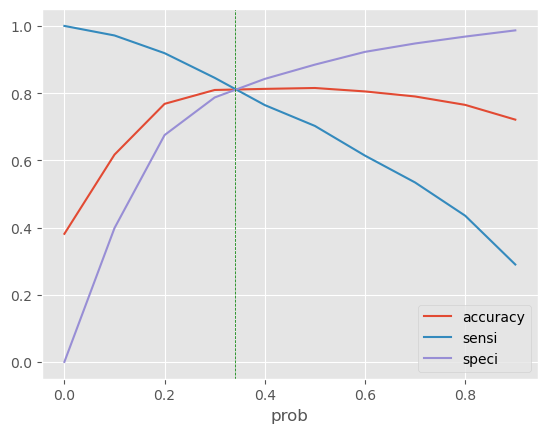

In [93]:
#Plotting accuracy sensitivity and specificity for various probabilities:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.34, color='green',linewidth = 0.55, linestyle='--')
plt.show()

##### From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [94]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,final_predicted
0,0,0.385525,1871,1
1,0,0.164142,6795,0
2,0,0.335903,3516,0
3,0,0.887526,8105,1
4,0,0.144294,3934,0


In [95]:
#Adding a lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,final_predicted,Lead_Score
0,0,0.385525,1871,1,39
1,0,0.164142,6795,0,16
2,0,0.335903,3516,0,34
3,0,0.887526,8105,1,89
4,0,0.144294,3934,0,14


In [96]:
#Checking the overall accuracy:
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8098330241187384


In [97]:
#Confusion matrix:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3247,  755],
       [ 475, 1991]], dtype=int64)

In [98]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [99]:
#Checking sensitivity of logistic regression model:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8073803730738037


In [100]:
#Calculating specificity:
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.811344327836082


In [101]:
#Calculating False Postive Rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.18865567216391804


In [102]:
#Calculating positive predictive value: 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7250546249089584


In [103]:
#Calculating negative predictive value:
print ('Negative Predictive Value :',TN / float(TN+ FN))

Negative Predictive Value : 0.8723804406233208


### Precision and Recall
> Precision: Probability that a predicted 'Yes' is actually a 'Yes'.

> Recall:  Probability that an actual 'Yes' case is predicted correctly.

In [104]:
#Looking at the confusion matrix again:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3247,  755],
       [ 475, 1991]], dtype=int64)

####  Precision
TP / TP + FP

In [105]:
print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7250546249089584


#### Recall
TP / TP + FN

In [106]:
print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.8073803730738037


#### Using sklearn utilities 

In [107]:
from sklearn.metrics import precision_score, recall_score

In [108]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted))

Precision : 0.7250546249089584


In [109]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Recall : 0.8073803730738037


### Precision and recall tradeoff

In [110]:
from sklearn.metrics import precision_recall_curve

In [111]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: final_predicted, Length: 6468, dtype: int64)

In [112]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

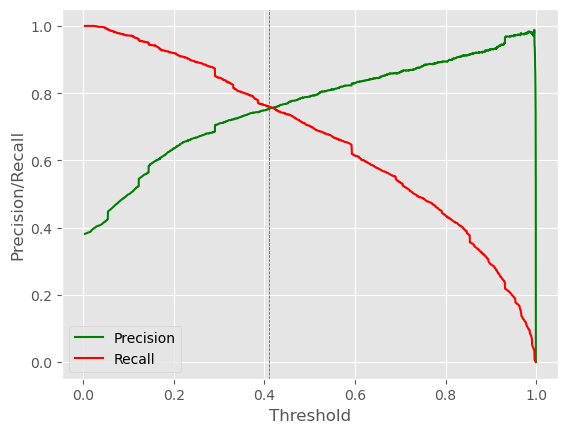

In [113]:
#Plotting a trade-off curve between precision and recall:
plt.plot(thresholds, p[:-1], "g-", label = 'Precision')
plt.plot(thresholds, r[:-1], "r-", label = 'Recall')

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.show()

## Step 11 : Making predictions on the test set

In [114]:
y_test = lead_test.pop('Converted')
X_test = lead_test

In [115]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [116]:
#Assigning the columns selected by the final model to the X_test:
X_test = X_test[cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Hospitality Management,Specialization_Others,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4269,0,0.964504,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0
2376,0,-0.885371,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
7766,0,-0.777416,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
9199,0,-0.885371,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4359,0,-0.885371,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
#Adding a constant:
X_test_sm = sm.add_constant(X_test)

#Making predictions on the test set:
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

4269    0.401202
2376    0.930790
7766    0.937588
9199    0.144294
4359    0.853142
9186    0.698361
1631    0.591450
8963    0.177408
8007    0.051018
5324    0.485669
dtype: float64

In [118]:
#Converting y_test_pred to a dataframe which is an array:
y_pred_1 = pd.DataFrame(y_test_pred)

In [119]:
y_pred_1.head()

,0
4269,0.401202
2376,0.930790
7766,0.937588
9199,0.144294
4359,0.853142


In [120]:
#Converting y_test to dataframe:
y_test_df = pd.DataFrame(y_test)

In [121]:
#Putting Prospect ID to index:
y_test_df['Prospect ID'] = y_test_df.index

In [122]:
#Removing index for both dataframes to append them side by side:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [123]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [124]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.401202
1,1,2376,0.930790
2,1,7766,0.937588
3,0,9199,0.144294
4,1,4359,0.853142


In [125]:
#Renaming the column: 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [126]:
#Rearranging the columns:
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [127]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,4269,1,0.401202
1,2376,1,0.930790
2,7766,1,0.937588
3,9199,0,0.144294
4,4359,1,0.853142


In [128]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [129]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,4269,1,0.401202,1
1,2376,1,0.930790,1
2,7766,1,0.937588,1
3,9199,0,0.144294,0
4,4359,1,0.853142,1


In [130]:
#Checking the overall accuracy:
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8167388167388168


In [131]:
#Confusion matrix:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1368,  309],
       [ 199,  896]], dtype=int64)

In [132]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [133]:
#Checking sensitivity of logistic regression model:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8182648401826484


In [134]:
#Calculating specificity:
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.815742397137746


In [135]:
#Assigning Lead Score to the Testing data:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,4269,1,0.401202,1,40
1,2376,1,0.930790,1,93
2,7766,1,0.937588,1,94
3,9199,0,0.144294,0,14
4,4359,1,0.853142,1,85


## RESULTS
### 1. Comparing values obtained for Train and Test data:
#### TRAIN DATA: 
- Accuracy : 80.98 %
- Sensitivity : 80.73 %
- Specificity : 81.13 %

#### TEST DATA:
- Accuracy : 81.67 %
- Sensitivity : 81.82 %
- Specificity : 81.57 %


-- Therefore, the goal of the target lead conversion rate to be around 80% is achieved. The accuracy values for both the train and test data are close to each other, with the test accuracy being slightly lower than the train accuracy, which is reasonable. The sensitivity and specificity values for both the train and test data are also reasonably close, which indicates that the model generalizes well and performs consistently across different datasets.

### 2. Finding out the 'Hot Leads'
The customers with a higher score, that is 'Lead Score' greater than or equal to 85, which are likely to be converted are the 'Hot Leads'.

In [136]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,2376,1,0.930790,1,93
2,7766,1,0.937588,1,94
4,4359,1,0.853142,1,85
12,2935,1,0.876110,1,88
13,2907,1,0.933823,1,93
...,...,...,...,...,...
2711,8092,1,0.985647,1,99
2733,5362,1,0.914730,1,91
2740,6944,1,0.992284,1,99
2768,2152,1,0.930790,1,93


- There are 405 leads which can be contacted and have a high chance of getting converted comparatively. 

### 3. Prospect ID of customers that can be contacted

In [137]:
print("The Prospect ID of the customers which should be contacted are :")
hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([2376, 7766, 4359, 2935, 2907,  493, 4877, 8429, 1200, 5638, 7631,
       6666, 5448, 1287, 8103, 3444, 2392, 5363, 7065, 8499, 4830, 3192,
       1365, 6687, 5793, 6066, 8099, 4868, 8120, 2844, 4896,   88, 7683,
       4949, 4058, 5042,  269, 5666, 2115, 8113, 2481, 1965, 3845, 2946,
       4869, 7627,  954, 4902, 5818, 2804, 7157,  446, 2629, 3725, 4786,
       8348, 1026, 2918,   76, 7859, 5825, 8055, 2266, 4403, 2926, 2524,
       1867, 7503, 1467, 5697, 6725, 6156, 2055, 2549, 2653, 3478, 5687,
       4445, 5832, 3190,   77, 4982, 9026, 6243, 4038, 7187, 5812, 4646,
       7033, 3188, 7716, 8556, 7925, 3500, 7818, 1675, 4483, 3321, 7053,
       1350, 8576, 6996, 7877, 7334, 6375, 7222, 5586, 7482, 6383, 1425,
       8904,  650, 3172, 2158, 3919, 5784, 3455, 5942, 6046,  472,  833,
       4612, 9087, 3456, 2688, 2914, 5263, 4613, 2525, 8098, 2662, 4281,
       2337, 6127, 6010, 4320, 7636,  507, 2631, 7448, 2285, 2578, 8920,
       8412, 3339, 8054, 8082, 3113, 4607, 7756, 80

### 4. Important aspects from final model

In [138]:
result.params.sort_values(ascending=False)

What is your current occupation_Working Professional    2.469845
Last Activity_Had a Phone Conversation                  2.294818
Lead Origin_Lead Add Form                               2.225621
Lead Source_Welingak Website                            2.044807
Last Notable Activity_Unreachable                       1.762643
Last Activity_SMS Sent                                  1.265192
Total Time Spent on Website                             1.084395
const                                                   0.493930
Specialization_Others                                  -0.425768
Last Notable Activity_Modified                         -0.888146
Specialization_Hospitality Management                  -0.935032
What is your current occupation_Others                 -1.077629
Lead Source_Facebook                                   -1.153834
Lead Source_Google                                     -1.173839
Do Not Email                                           -1.190514
Lead Source_Referral Site

### 5. Recommendations
### To increase Lead Conversion Rate
- Focus on features with positive coefficients for targeted marketing strategies.
- Develop strategies to attract high-quality leads from top-performing lead sources.
- Engage working professionals with tailored messaging.
- Optimize communication channels based on lead engagement impact.
- More budget/spend can be done on Welingak Website in terms of advertising, etc.
- Incentives/discounts for providing reference that convert to lead, encourage providing more references.
- Working professionals to be aggressively targeted as they have high conversion rate and will have better financial situation to pay higher fees too.
### To identify areas of improvement
- Analyze negative coefficients in specialization offerings.
- Review landing page submission process for areas of improvement.